# Clasificador de sobrevivientes del Titanic.

El presente Jupyter Notebook, nos presenta el tipico flujo de trabajo que deberemos desarrollar en proyectos de Analisis de datos; por lo tanto, se presentarán todos los pasos a seguir en un proyecto real.

## Fases del flujo de trabajo.

Inicialmente, el flujo de trabajo que comprende el analisis de datos consta de 7 pasos:

- Definición del problema
- Adquisicion de datos
- Preparación de datos (limpieza)
- Analisis exploratorio (EDA)
- Modelación y resolución del problema
- Visualizacion de datos y redaccion del reporte (Informes, canvas, planillas, etc.)
- Presentación de resultados.

Si bien, inicialmente esto se presenta de forma secuencial; en realidad presenta un esquema ciclico en el que pueden interactuar varias fases entre si, tal como se presenta en la Fig. :
<img src=https://www.tibco.com/sites/tibco/files/media_entity/2019-03/data_science-diagram.svg >





### Definicion del problema

Desde la competicion de [Kaggle](https://www.kaggle.com/competitions/titanic) se nos presenta de forma explicita cual es el problema a resolver, en este caso se pretende a partir de un set de entrenamiento que contiene pasajeros que sobrevivieron o fallecieron en el accidente del Titanic, en base a este se pretende desarrollar un modelo que determine si los pasajeros del test de prueba sobreviven o no al accidente. Adicionalmente es importante para todo proyecto conocer un poco del transfondo del problema donde, para este caso en concreto tenemos:

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Objetivos del flujo de trabajo

La solución del flujo de trabajo resuelve 7 objetivos principales:

- Clasificación
- Correlación
- Conversión de datos a variables numericas
- Completación de elementos faltantes 
- Corrección de outliers
- Creación de nuevos atributos en base a los ya existentes
- Seleccion de Graficos/visualización correcta

### Adquisición de datos y librerias

Podemos adquirir directamente los datos de Kaggle utilizando su API o descargando sus datos (más facil), Adicionalmente se cargaran sus librerias que como veran con el tiempo, muchas de estas se repetiran en sus proyectos.

In [2]:
# Analisis de datos
import pandas as pd
import numpy as np
import random as rnd

# Visualizacion

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [3]:
# Definicion de los datasets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### EDA

In [6]:
# Que contienen los datos?
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# tamaño de los datos?
train_df.shape

(891, 12)

In [8]:
# Nulos, existen? cuantos?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Se observan que faltan datos en edad, cabina y embarque

In [9]:
# distribucion de las variables numericas
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Comportamiento de las variables categoricas
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Posteriormente, debemos realizar el estudio en base a nuestras variables objetivo; en este caso nos interesa saber si sobrevive el pasajero (0 = No sobrevive, 1 = Sobrevive) y su ID

In [11]:
train_df.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Adicionalmente, podemos ver la variable objetivo vs el sexo del pasajero, para lograr identificar alguna correlacion.

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

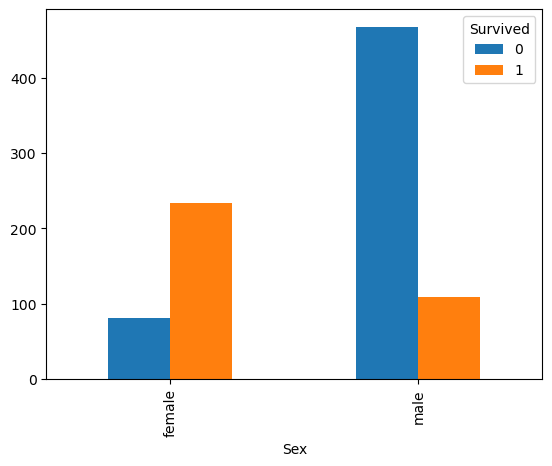

In [12]:
grouped_sex= train_df.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())           #Unstack cuadricula los datos
plt.show

Por ultimo podemos ver la relacion entre el embarque y y la clase del pasajero

AxesSubplot(0.125,0.11;0.775x0.77)


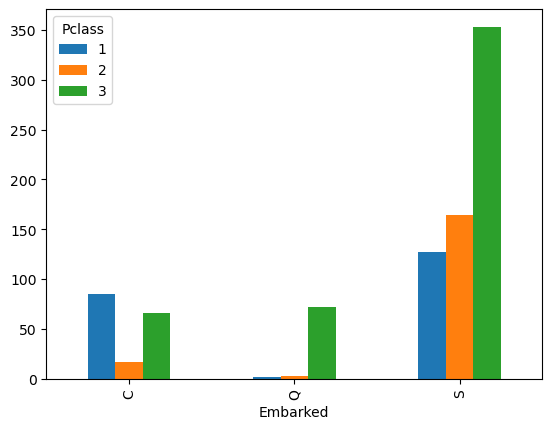

In [13]:
print(train_df.groupby(['Pclass','Embarked']).count()['PassengerId'].unstack(level = 0).plot.bar())

Esto lo podemos hacer mas facilmente utilizando la matriz de correlacion, sin embargo debemos estandarizar la variable sexo

In [14]:
train_df['Sex'] = train_df['Sex'].map({'female':1, 'male':0}).astype(int)


In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

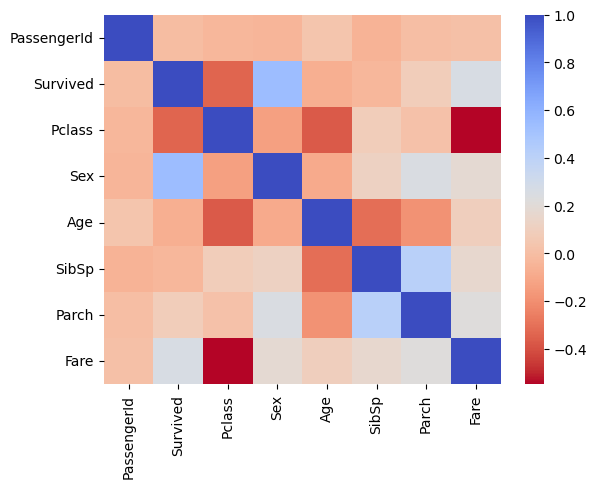

In [16]:
corr = train_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

Donde tal como vimos con anterioridad, se presenta una correlacion entre el genero de la persona y su estatus.

### Preparacion y procesamiento de los datos

Comenzamos seleccionando las variables que consideramos de interes (Las que se obtienen del EDA) como lo son:

- Survived
- Pclass
- Age
- Sex

In [17]:
train = train_df[['Survived','Sex','Age','Pclass']]
train.head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [18]:
# Datos nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 24.5 KB


Dado que anteriormente transformamos la variable sexo a numerico, solo se nos presenta el problema de los valores nulos en la edad, para esto podemos utilizar el método .isna()

In [19]:
(train_df[train_df['Age'].isna()].groupby(['Sex','Pclass']).count()['PassengerId'].unstack(level=0))

Sex,0,1
Pclass,,
1,21,9
2,9,2
3,94,42


Se observa que mayoritariamente son hombres de 3ra clase quienes no registraron su edad

In [20]:
(train_df[train_df['Age'].isna()].groupby(['SibSp','Parch']).count()['PassengerId'].unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


Se observa que las personas que viajaban solas pueden presentar algun tipo de valor para el estudio

In [21]:
# Para reemplazar los valores nulos, se pueden utilizar diferentes tecnicas, en nuestro caso reemplazaremos estos valores por la mediana
train_df['Age'].median()

28.0

In [22]:
#reemplazamos el valor

train['Age'] = train['Age'].fillna(28.0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 24.5 KB


C:\Users\Camilo\AppData\Local\Temp\ipykernel_10812\225447880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train['Age'].fillna(28.0)


#### Creacion de variables nuevas

Tal como observó recientemente, las personas que viajaban solas en el titanic; pueden presentar cierta informacion de interes por lo tanto, crearemos una nueva variable que contenga estos datos. 

In [23]:
train_df['FlagSolo'] = np.where((train_df['SibSp'] == 0) &  (train_df['Parch'] == 0), 1, 0) 
# 0 No viaja solo 
# 1 Viaja solo

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


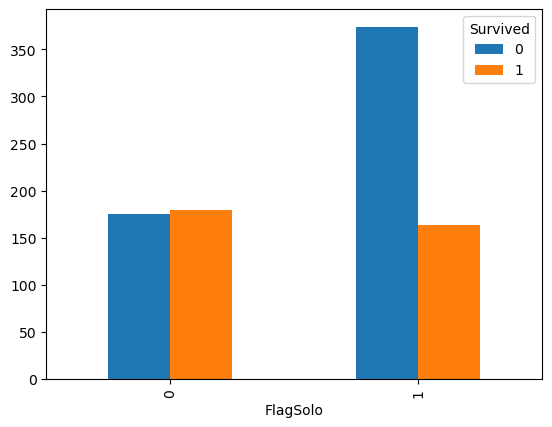

In [24]:
grouped_flag = train_df.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [25]:
#agregamos el flag solo a nuestras variables de interes
train['FlagSolo'] = train_df['FlagSolo']
train.head(3)

C:\Users\Camilo\AppData\Local\Temp\ipykernel_10812\1789394599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FlagSolo'] = train_df['FlagSolo']


,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


Por lo tanto, De lo anterior se puede identificar que Existe un gran numero de personas que viajaban solos que no sobrevivieron.

Por lo tanto terminamos de definir las variables para nuestro modelo. Adicionalmente, se realiza la matriz de correlacion entre las variables de estudio.

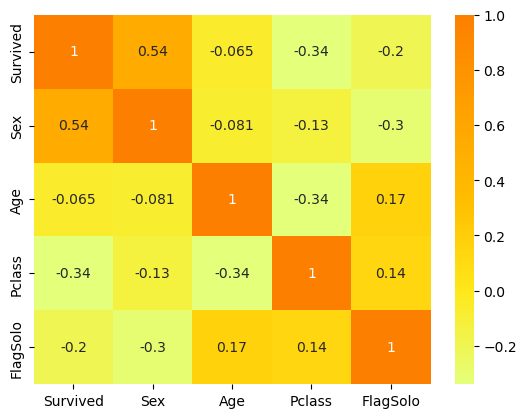

In [26]:
corr = train.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

### Modelo

Se definen inicialmente las variables dependientes e independientes del problema.

In [27]:
# Variable dependiente
Y_train = train['Survived']

# preprocesamiento de variables independientes
V_indep = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train= train[V_indep]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


In [28]:
# trabajos sobre el test
test_df['Sex'] = test_df['Sex'].map({'female':1, 'male':0}).astype(int)
test_df['Age'] = test_df['Age'].fillna(28.0)
test_df['FlagSolo'] = np.where((test_df['SibSp'] == 0) &  (test_df['Parch'] == 0), 1, 0)


In [29]:
test_df[V_indep].head(3)

,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [30]:
#set de pruebas 
X_test = test_df[V_indep]
X_test.shape

(418, 4)

Para la implementación de los modelos, utilizaremos:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Stochastic Gradient Descent
- RVM or Relevance Vector Machine

donde posteriormente se realizará su evaluacion/validacion

#### Logistic Regression

Es un modelo que puede correr prematuramente en el flujo de trabajo, relaciona la variable categorica dependiente con las variables dependientes utilizando estimaciones de probabilidad por funciones logicas.

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.79

#### KNN

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.28

#### SVM

In [33]:
svc = SVC()
svc.fit(X_train,Y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

63.3

#### Naive Bayes

In [34]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.0

#### Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.45

#### Random Forrest 

In [36]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)

Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.45

#### Perceptron


In [37]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)

Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

76.88

#### Stochastic Gradient Decent

In [38]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.22

#### Linear SVC

In [39]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\Camilo\anaconda3\envs\Project_titanic\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.91

### Evaluacion
En este punto debemos evaluar nuestros modelos, para así identificar cual de todos los metodos utilizados es el que se ajusta correctamente a nuestros datos; para esto, podemos utilizar dos metodos:
- matriz de confusión 
- Recuento de score

In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.45
8,Decision Tree,89.45
1,KNN,83.28
7,Linear SVC,79.91
2,Logistic Regression,78.79
4,Naive Bayes,78.00
6,Stochastic Gradient Decent,77.22
5,Perceptron,76.88
0,Support Vector Machines,63.30


In [41]:
# matriz confusion para modelos
def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()


accuracy:  0.79


c:\Users\Camilo\anaconda3\envs\Project_titanic\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


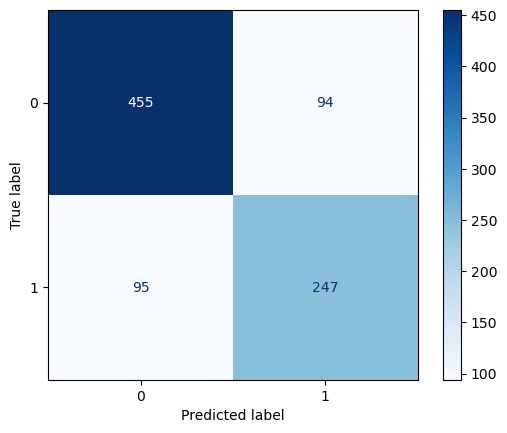

In [42]:
conf_mat_acc(logreg)

In [43]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [44]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
